In [11]:
from tensorflow import keras
from tensorflow.keras import layers

### If there is no max pooling layer

In [21]:
inputs = keras.Input(shape=(32, 32, 3), name="input")
x = layers.Conv2D(32, 3, activation="relu", name="repr_1") (inputs)
residual = x
x = layers.Conv2D(64, 3, activation="relu", padding="same", name="repr_2") (x)
residual = layers.Conv2D(64, 1, name="residual_resizing") (residual)
outputs = layers.add([x, residual], name="add")
model = keras.Model(inputs, outputs, name="residual_connection")

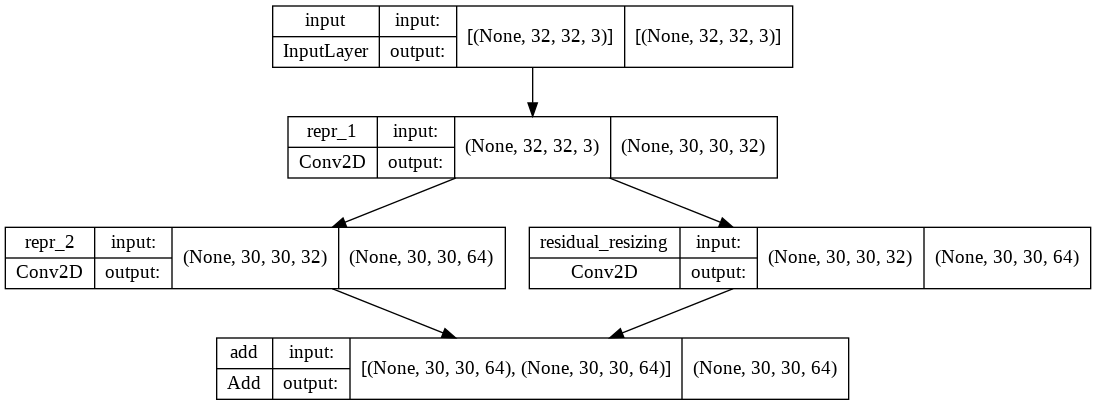

In [22]:
keras.utils.plot_model(model, show_shapes=True)

### Presence of max pooling layer

In [27]:
inputs = keras.Input(shape=(32, 32, 3))
x = layers.Conv2D(32, 3, activation="relu", name="repr_1") (inputs)
residual = x
x = layers.Conv2D(64, 3, activation="relu", padding="same", name="repr_2") (x)
x = layers.MaxPooling2D(2, padding="same", name="pooling") (x)
residual = layers.Conv2D(64, 1, strides=2, name="residual_resizing") (residual)
outputs = layers.add([x, residual], name="add")
model_2 = keras.Model(inputs, outputs)

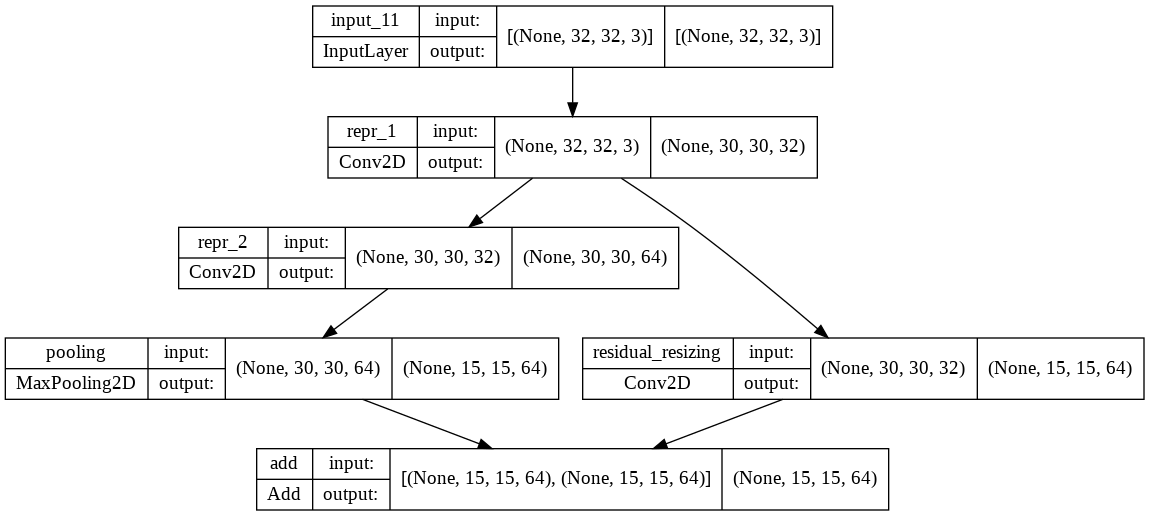

In [28]:
keras.utils.plot_model(model_2, show_shapes=True)

### A full fledged model which includes both types

In [29]:
inputs = keras.Input(shape=(32, 32, 3))
x = layers.Rescaling(1./255) (inputs)

def residual_block(x, filters, pooling=False):
    residual = x
    x = layers.Conv2D(filters, 3, activation="relu", padding="same") (x)
    x = layers.Conv2D(filters, 3, activation="relu", padding="same") (x)
    if pooling:
        x = layers.MaxPooling2D(2, padding="same") (x)
        residual = layers.Conv2D(filters, 1, strides=2) (residual)
    elif filters != residual.shape[-1]:
        residual = layers.Conv2D(filters, 1) (residual)
    x = layers.add([x, residual])
    return x

x = residual_block(x, 32, pooling=True)
x = residual_block(x, 64, pooling=True)
x = residual_block(x, 128, pooling=False)

x = layers.GlobalAveragePooling2D() (x)
outputs = layers.Dense(1, activation="sigmoid") (x)
model_3 = keras.Model(inputs, outputs)


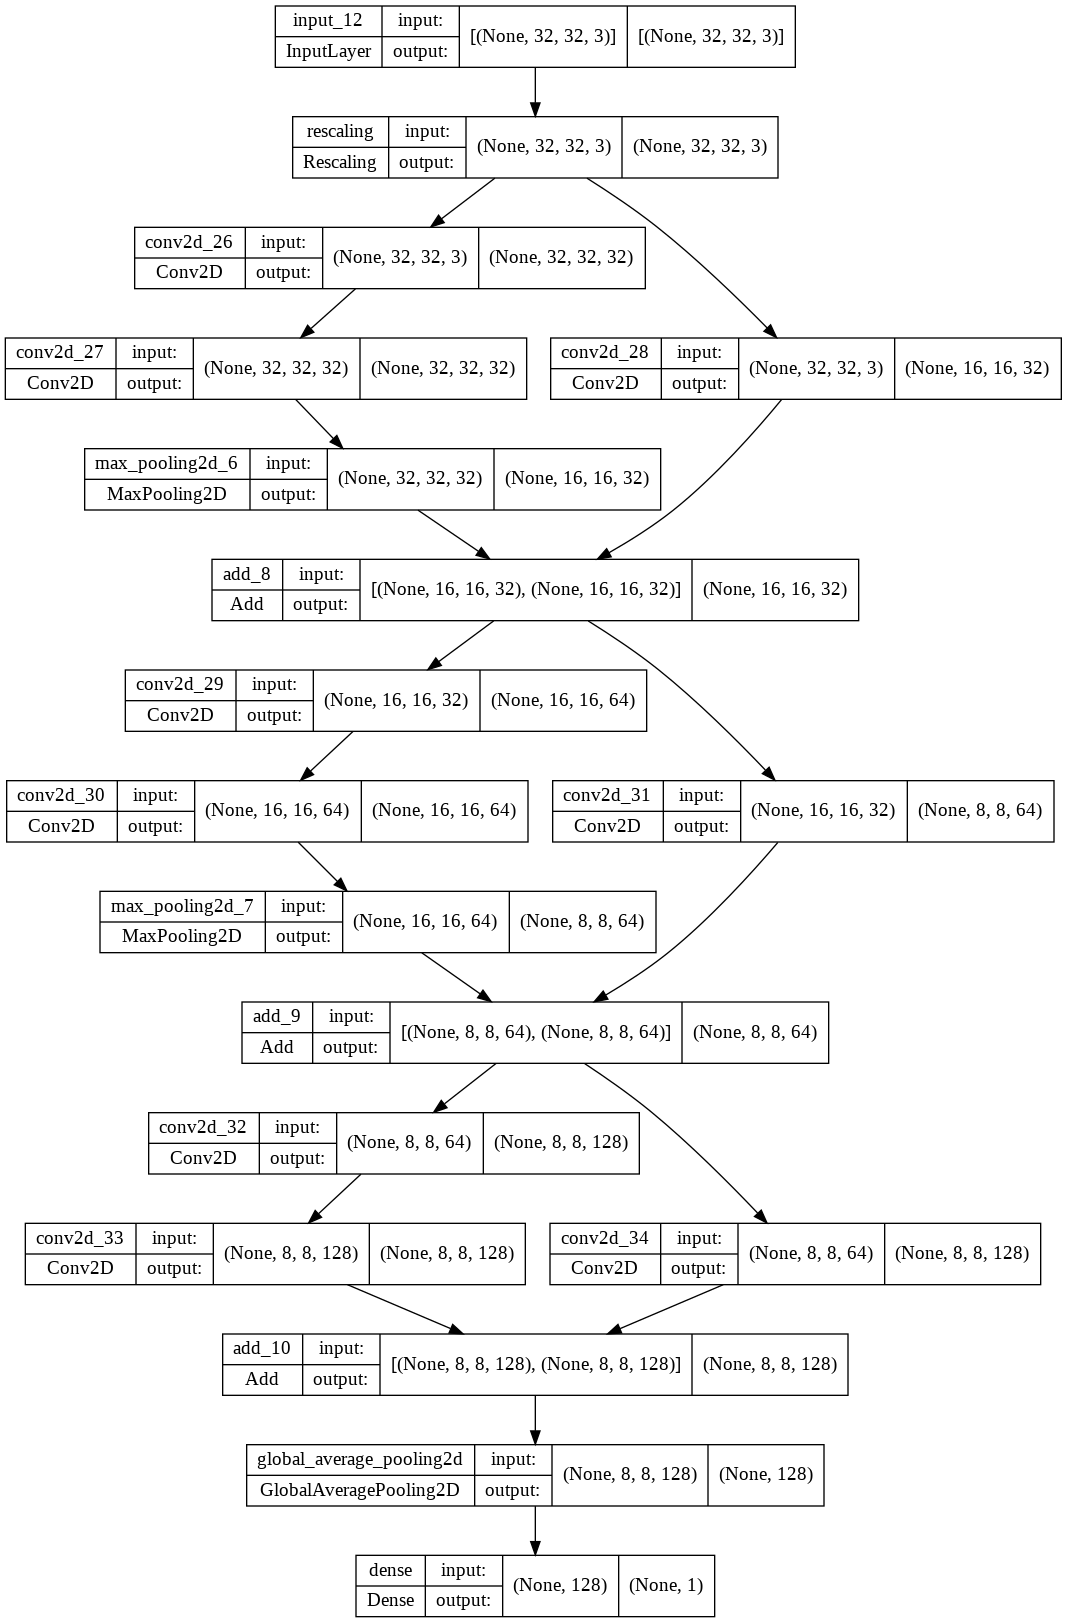

In [31]:
keras.utils.plot_model(model_3, show_shapes=True)